In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pyceptron import SingleLayerPerceptron

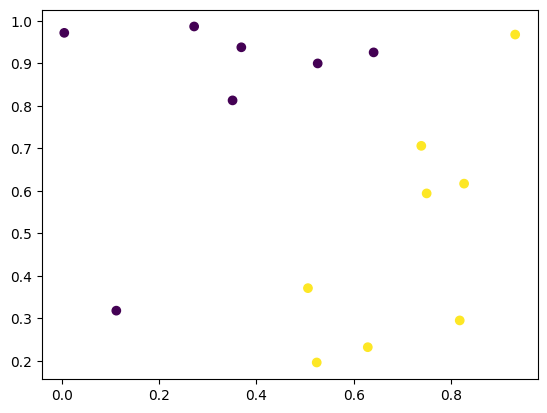

In [9]:
# Read data from lineal separable dataset
ds = pd.read_csv("data/lineal.csv", names=["x1", "x2", "y"])

# Split data into input and output
x_inp = ds[["x1", "x2"]].to_numpy()
y_out = ds["y"].to_numpy()

# Plot the data points with different colors
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
plt.show()


In [10]:
# Check the shape of the input and output
print(x_inp.shape, y_out.shape)


(15, 2) (15,)


In [11]:
# Define the network size
n_input = 2
n_output = 1

# Create a single-layer perceptron
slp = SingleLayerPerceptron(n_input, n_output)

# Train the model
slp.fit(x_inp, y_out, iters=500, eta=1)


Iteration:   1, Error: 2.63729495e+00
Iteration:   2, Error: 1.76590964e+00
Iteration:   3, Error: 1.24661181e+00
Iteration:   4, Error: 1.13149533e+00
Iteration:   5, Error: 1.03090544e+00
Iteration:   6, Error: 9.50988007e-01
Iteration:   7, Error: 8.81505026e-01
Iteration:   8, Error: 8.24235528e-01
Iteration:   9, Error: 7.75047355e-01
Iteration:  10, Error: 7.33288080e-01
Iteration:  11, Error: 6.96998809e-01
Iteration:  12, Error: 6.65149447e-01
Iteration:  13, Error: 6.36773596e-01
Iteration:  14, Error: 6.11234015e-01
Iteration:  15, Error: 5.88053804e-01
Iteration:  16, Error: 5.66882873e-01
Iteration:  17, Error: 5.47447647e-01
Iteration:  18, Error: 5.29527766e-01
Iteration:  19, Error: 5.12940902e-01
Iteration:  20, Error: 4.97534049e-01
Iteration:  21, Error: 4.83177496e-01
Iteration:  22, Error: 4.69760450e-01
Iteration:  23, Error: 4.57187651e-01
Iteration:  24, Error: 4.45376704e-01
Iteration:  25, Error: 4.34255947e-01
Iteration:  26, Error: 4.23762732e-01
Iteration:  

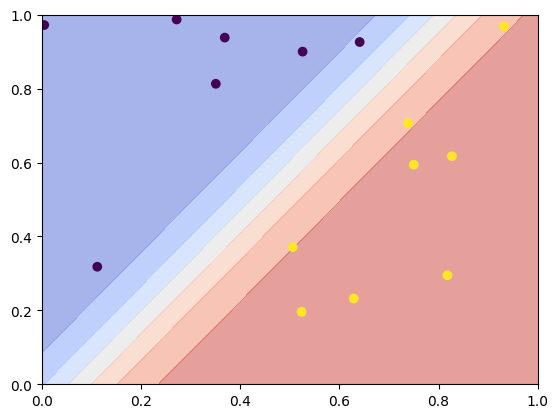

In [12]:
# Validate a meshgrid in [0,1]^2
pts = np.linspace(0, 1, 100)
x1, x2 = np.meshgrid(pts, pts)

# Predict the meshgrid
validation_data = np.vstack([x1.flatten(), x2.flatten()])
pred = slp.predict(validation_data)

# Plot the meshgrid with different colors
plt.contourf(x1, x2, pred.reshape(x1.shape), cmap="coolwarm", alpha=0.5)
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
plt.show()


Iteration:   1, Error: 1.72489032e+00
Iteration:   2, Error: 1.48270424e+00
Iteration:   3, Error: 1.32830160e+00
Iteration:   4, Error: 1.20119685e+00
Iteration:   5, Error: 1.09555615e+00
Iteration:   6, Error: 1.00668774e+00
Iteration:   7, Error: 9.31346613e-01
Iteration:   8, Error: 8.66899110e-01
Iteration:   9, Error: 8.11315716e-01
Iteration:  10, Error: 7.62987307e-01
Iteration:  11, Error: 7.20647852e-01
Iteration:  12, Error: 6.83290007e-01
Iteration:  13, Error: 6.50108430e-01
Iteration:  14, Error: 6.20453955e-01
Iteration:  15, Error: 5.93799563e-01
Iteration:  16, Error: 5.69714230e-01
Iteration:  17, Error: 5.47842943e-01
Iteration:  18, Error: 5.27891290e-01
Iteration:  19, Error: 5.09613499e-01
Iteration:  20, Error: 4.92803112e-01
Iteration:  21, Error: 4.77285645e-01
Iteration:  22, Error: 4.62912799e-01
Iteration:  23, Error: 4.49557834e-01
Iteration:  24, Error: 4.37111883e-01
Iteration:  25, Error: 4.25480965e-01
Iteration:  26, Error: 4.14583576e-01
Iteration:  

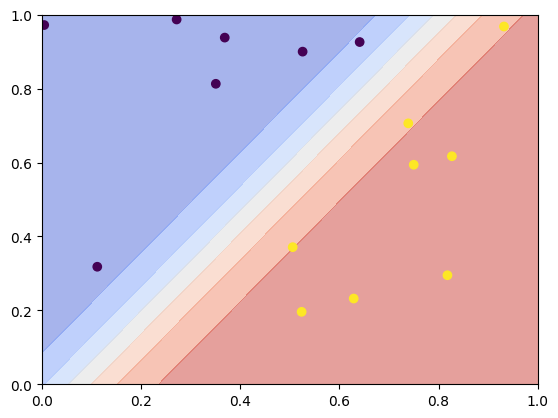

In [13]:
# Recreate the experiment with the multi-layer perceptron
from pyceptron import MultiLayerPerceptron

# Create a multi-layer perceptron
mlp = MultiLayerPerceptron([n_input, n_output])

# Train the model
mlp.fit(x_inp, y_out, iters=500, eta=1)

# Predict the meshgrid
pred = mlp.predict(validation_data)

# Plot the meshgrid with different colors
plt.contourf(x1, x2, pred.reshape(x1.shape), cmap="coolwarm", alpha=0.5)
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
plt.show()
